In [86]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [87]:
!python3 -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 3.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [88]:
# Load spacy English languague model
NER = spacy.load('en_core_web_sm')

In [89]:
import os
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [90]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [91]:
book = all_books[1]
book_text = open(book).read()

In [92]:
book_doc = NER(book_text)

In [93]:
book_doc

ï»¿The Limits of the Possible
I
"He's not coming back out, I tell you!" stated a pimply-faced man, shaking his head with
finality. "It's been an hour and a quarter since he went in. He's done for."
The townsfolk, huddled together in the midst of the ruins and rubble, watched the gaping
black hole of the entrance to the tunnel in silence. A fat man dressed in a yellow smock
shifted slightly from one foot to the other, cleared his throat and pulled his wrinkled cap from
his head.
"We have to wait a bit longer," he said as he wiped the sweat from his sparse eyebrows.
"Why wait?" snorted pimply, "There in the caves lurks a basilisk, or have you forgotten,
burgrave? Anyone goes down there, that's the end of them. Have you forgotten how many
have died down there already? What are we waiting for?"
"This was the agreement, wasn't it?" murmured the fat man uncertainly.
"An agreement you made with a living man, burgrave" said the pimply-faced man's
companion, a giant of a man in a leather butche

In [94]:
# Visualize identified entities
displacy.render(book_doc[0:2000],style = 'ent', jupyter = True)

In [95]:
# Read characters
character_df = pd.read_csv('characters.csv')

In [96]:
character_df

book               character
0      Category:Baptism of Fire characters                  Adalia
1      Category:Baptism of Fire characters                   Adela
2      Category:Baptism of Fire characters           Aen Saevherne
3      Category:Baptism of Fire characters                Aevenien
4      Category:Baptism of Fire characters                  Aglaïs
...                                    ...                     ...
1269  Category:Time of Contempt characters        Yanna of Murivel
1270  Category:Time of Contempt characters           Yarpen Zigrin
1271  Category:Time of Contempt characters  Yennefer of Vengerberg
1272  Category:Time of Contempt characters         Yiolenta Suarez
1273  Category:Time of Contempt characters                   Zyvik

[1274 rows x 2 columns]

In [97]:
# Remove brackets and text within brackets
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [98]:
pd.set_option('display.max_rows', None)
character_df

book  \
0                   Category:Baptism of Fire characters   
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

In [99]:
#Getting named entity list per sentence
sent_entity_df = []

In [100]:
# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [101]:
sent_entity_df

sentence  \
0      (ï»¿The, Limits, of, the, Possible, \n, I, \n,...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2                                 (He, 's, done, for, .)   
3      (", \n, The, townsfolk, ,, huddled, together, ...   
4      (A, fat, man, dressed, in, a, yellow, smock, \...   
5      (", We, have, to, wait, a, bit, longer, ,, ", ...   
6      (", Why, wait, ?, ", snorted, pimply, ,, ", Th...   
7      (Anyone, goes, down, there, ,, that, 's, the, ...   
8      (Have, you, forgotten, how, many, \n, have, di...   
9      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
10     (", An, agreement, you, made, with, a, living,...   
11     (", He, is, now, dead, ,, as, surely, as, the,...   
12     (It, was, plain, from, the, beginning, that, h...   
13     (He, did, n't, even, take, a, mirror, with, hi...   
14     (", \n, ", At, least, we, 've, saved, some, co...   
15                   (You, might, as, well, go, home, .)   
16     (As, far, as, the, sorcerer, 's, horse, and, b...   
17     (", \n, ", Yes, ,, ", said, the, butcher, ,, "...   
18                           (Let, 's, take, a, look, .)   
19     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
20     (Do, n't, get, in, the, way, unless, you, want...   
21     (", A, fine, old, mare, ,, ", repeated, the, b...   
22      (", Leave, the, horse, alone, ,, my, darling, .)   
23     (", \n, The, butcher, slowly, turned, around, ...   
24     (The, stranger, had, thick, curly, brown, hair...   
25                         (He, had, no, weapons, ., \n)   
26     (3, \n, ", Step, away, from, the, horse, ,, ",...   
27                          (", What, have, we, here, ?)   
28     (A, horse, and, saddlebags, belonging, to, ano...   
29     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
30     (The, butcher, gave, a, nod, and, signalled, t...   
31     (Both, carried, heavy, clubs, ,, like, those, ...   
32     (", Who, are, you, ?, ", demanded, the, pimply...   
33     (", That, 's, none, of, your, business, ,, my,...   
34                (", \n, ", You, carry, no, weapons, .)   
35     (", \n, ", That, 's, true, ,, ", the, stranger...   
36     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
37     (", \n, The, butcher, also, drew, a, blade, ;,...   
38     (The, other, two, men, approached, ,, brandish...   
39     (", I, do, n't, carry, weapons, ,, ", responde...   
40     (", \n, From, behind, the, ruins, ,, two, youn...   
41     (The, crowd, quickly, parted, ,, retreated, th...   
42     (The, girls, smiled, ,, flashing, their, teeth...   
43     (They, had, blue, stripes, tattooed, from, the...   
44     (Lynx, pelt, clad, their, strong, muscles, fro...   
45     (From, behind, the, mail, -, clad, shoulder, o...   
46     (Pimply, got, down, on, one, knee, and, slowly...   
47     (From, the, hole, in, ruins, came, a, rumble, ...   
48     (Following, the, hands, ,, a, white, head, app...   
49               (A, murmur, escaped, the, crowd, ., \n)   
50     (The, alabaster, -, haired, man, straightened,...   
51     (Holding, the, beast, by, its, long, lizard, -...   
52     (The, burgrave, jumped, backwards, and, trippe...   
53     (Its, slashed, throat, ,, once, carmine, ,, wa...   
54              (Its, sunken, eyes, were, glassy, ., \n)   
55     (", Here, 's, the, basilisk, ,, ", said, the, ...   
56     (I, will, check, them, ,, I, 'm, warning, you, .)   
57     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
58     (The, white, -, haired, man, looked, around, a...   
59     (He, also, noticed, the, man, in, the, brown, ...   
60     (", It, 's, always, the, same, ,, ", he, said,...   
61     (You, people, never, change, ,, damn, you, to,...   
62     (", We, have, n't, touched, your, bags, ,, ", ...   
63     (The, men, armed, with, the, clubs, had, long,...   
64     (", Your, things, have, not, been, disturbed, ...   
65     (At, the, sight, of, his, smile, ,, which, blo...   
66     (", And, that, is, wh

In [102]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [103]:
filter_entity(["Geralt", "Yennefer", "Ayushma", "1"], character_df)

['Geralt', 'Yennefer']

In [104]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence         entities  \
96   (Is, there, anything, keeping, you, in, this, ...  [Geralt, Rivia]   
104  (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...  [Borch, Geralt]   
108  (", \n, ", There, are, some, ,, ", Geralt, rep...         [Geralt]   
140  (", I, forgot, ,, ", Three, Jackdaws, winked, ...  [Three, Geralt]   
151  (Geralt, loosened, his, belt, ,, removed, his,...         [Geralt]   
157  (", Do, the, girls, speak, the, common, langua...         [Geralt]   
160  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...         [Geralt]   
172  (Yet, there, is, a, certain, principal, underl...         [Geralt]   
201    (", Bad, example, ,, ", interrupted, Geralt, .)    [Bad, Geralt]   
211  (", I, do, not, hunt, dragons, ,, ", Geralt, r...         [Geralt]   

    character_entities  
96            [Geralt]  
104           [Geralt]  
108           [Geralt]  
140           [Geralt]  
151           [Geralt]  
157           [Geralt]  
160           [Geralt]  
172           [Geralt]  
201           [Geralt]  
211           [Geralt]

In [105]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\User\AppData\Local\Temp\ipykernel_3832\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [106]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence         entities  \
96     (Is, there, anything, keeping, you, in, this, ...  [Geralt, Rivia]   
104    (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...  [Borch, Geralt]   
108    (", \n, ", There, are, some, ,, ", Geralt, rep...         [Geralt]   
140    (", I, forgot, ,, ", Three, Jackdaws, winked, ...  [Three, Geralt]   
151    (Geralt, loosened, his, belt, ,, removed, his,...         [Geralt]   
...                                                  ...              ...   
11276           (The, scene, left, Yurga, speechless, .)          [Yurga]   
11288  (Yurga, did, n't, see, Geralt, 's, face, ,, hi...         [Geralt]   
11289  (He, only, saw, black, -, gloved, hands, squee...           [Ciri]   
11300  (", \n, ", It, 's, just, like, they, predicted...         [Geralt]   
11307  (With, good, reason, :, \n, ", You, 're, more,...           [Ciri]   

      character_entities  
96              [Geralt]  
104             [Geralt]  
108             [Geralt]  
140             [Geralt]  
151             [Geralt]  
...                  ...  
11276            [Yurga]  
11288           [Geralt]  
11289             [Ciri]  
11300           [Geralt]  
11307             [Ciri]  

[1234 rows x 3 columns]

In [107]:
#Creating relationships
window_size = 5
relationships = [] 

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [108]:
relationship_df = pd.DataFrame(relationships)

In [109]:
#pd.set_option('display.max_rows', None)
relationship_df

source    target
0       Geralt  Niedamir
1       Geralt  Niedamir
2       Geralt  Niedamir
3     Niedamir    Geralt
4     Niedamir    Geralt
...        ...       ...
1997    Geralt      Ciri
1998    Geralt      Ciri
1999    Geralt      Ciri
2000    Geralt      Ciri
2001    Geralt      Ciri

[2002 rows x 2 columns]

In [110]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source    target
0     Geralt  Niedamir
1     Geralt  Niedamir
2     Geralt  Niedamir
3     Geralt  Niedamir
4     Geralt  Niedamir
...      ...       ...
1997    Ciri    Geralt
1998    Ciri    Geralt
1999    Ciri    Geralt
2000    Ciri    Geralt
2001    Ciri    Geralt

[2002 rows x 2 columns]

In [111]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [112]:
relationship_df.head(10)

source        target  value
0        Geralt      Niedamir     19
1          Eyck        Geralt     52
2    Dorregaray        Geralt     36
3    Dorregaray      Yennefer    100
4        Geralt        Yarpen     15
5  Gyllenstiern      Niedamir     33
6        Geralt        Kennet      2
7    Dorregaray        Yarpen      8
8        Boholt      Yennefer     66
9        Boholt  Gyllenstiern     19

In [113]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

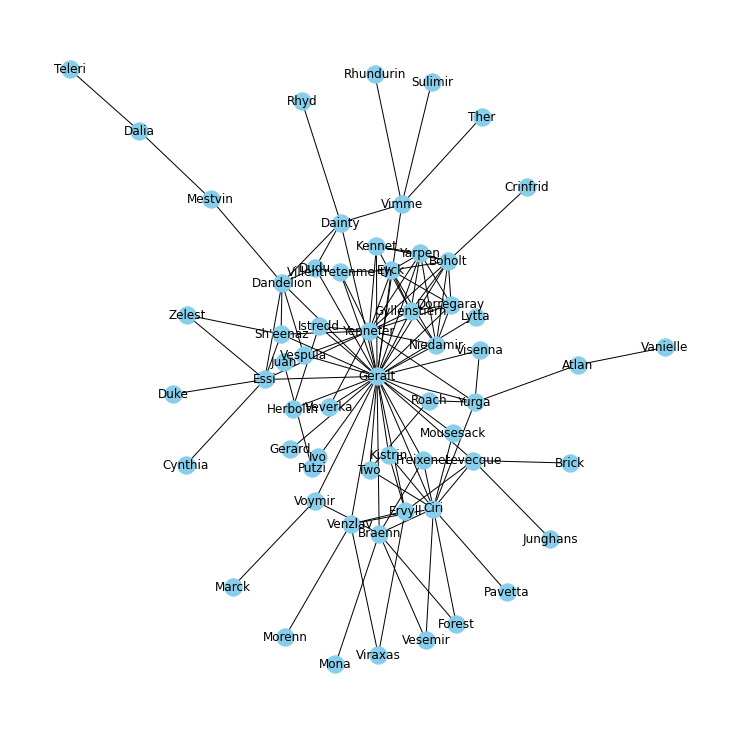

In [114]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [115]:
#Graph visualization - Pyvis
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

In [116]:
#The most important characters in The Witcher
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.5932203389830508,
 'Niedamir': 0.11864406779661017,
 'Eyck': 0.13559322033898305,
 'Dorregaray': 0.11864406779661017,
 'Yennefer': 0.2542372881355932,
 'Yarpen': 0.13559322033898305,
 'Gyllenstiern': 0.13559322033898305,
 'Kennet': 0.0847457627118644,
 'Boholt': 0.15254237288135594,
 'Crinfrid': 0.01694915254237288,
 'Villentretenmerth': 0.05084745762711865,
 'Istredd': 0.05084745762711865,
 'Herbolth': 0.03389830508474576,
 'Ivo': 0.01694915254237288,
 'Two': 0.05084745762711865,
 'Vespula': 0.05084745762711865,
 'Dainty': 0.0847457627118644,
 'Dandelion': 0.11864406779661017,
 'Rhyd': 0.01694915254237288,
 'Vimme': 0.0847457627118644,
 'Ther': 0.01694915254237288,
 'Sulimir': 0.01694915254237288,
 'Rhundurin': 0.01694915254237288,
 'Dudu': 0.05084745762711865,
 "Sh'eenaz": 0.0847457627118644,
 'Dalia': 0.03389830508474576,
 'Teleri': 0.01694915254237288,
 'Mestvin': 0.03389830508474576,
 'Essi': 0.11864406779661017,
 'Gerard': 0.01694915254237288,
 'Zelest': 0.0338983050

<AxesSubplot:>

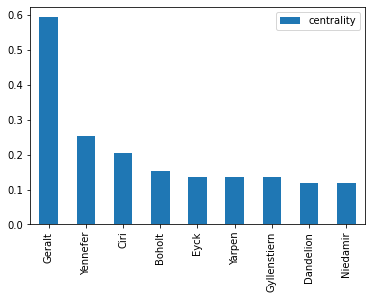

In [117]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

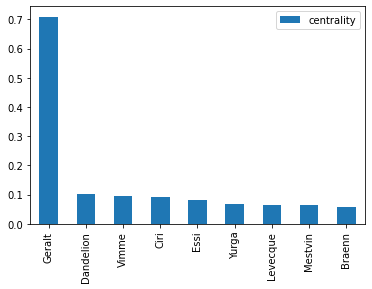

In [118]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

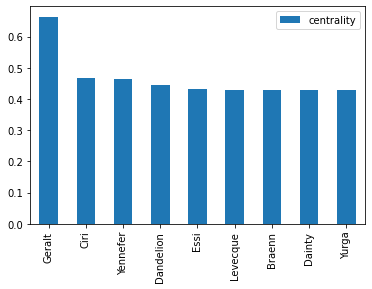

In [119]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [120]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [121]:
#Community detection
import community.community_louvain as community_louvain

In [122]:
communities = community_louvain.best_partition(G)

In [123]:
communities

{'Geralt': 0,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Kennet': 1,
 'Boholt': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 0,
 'Herbolth': 0,
 'Ivo': 0,
 'Two': 0,
 'Vespula': 3,
 'Dainty': 3,
 'Dandelion': 3,
 'Rhyd': 3,
 'Vimme': 3,
 'Ther': 3,
 'Sulimir': 3,
 'Rhundurin': 3,
 'Dudu': 3,
 "Sh'eenaz": 5,
 'Dalia': 3,
 'Teleri': 3,
 'Mestvin': 3,
 'Essi': 5,
 'Gerard': 0,
 'Zelest': 5,
 'Duke': 5,
 'Veverka': 0,
 'Juan': 2,
 'Putzi': 2,
 'Cynthia': 5,
 'Braenn': 4,
 'Ciri': 4,
 'Marck': 4,
 'Voymir': 4,
 'Ervyll': 4,
 'Kistrin': 4,
 'Vesemir': 4,
 'Freixenet': 4,
 'Venzlav': 4,
 'Viraxas': 4,
 'Morenn': 4,
 'Mona': 4,
 'Forest': 4,
 'Pavetta': 4,
 'Levecque': 4,
 'Junghans': 4,
 'Brick': 4,
 'Mousesack': 4,
 'Yurga': 0,
 'Visenna': 0,
 'Atlan': 0,
 'Vanielle': 0,
 'Lytta': 0,
 'Roach': 0}

In [124]:
nx.set_node_attributes(G, communities, 'group')

In [126]:
com_net = Network(notebook = True, width="1000px", height="1000px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")